# Treinamento e conversão do modelo.

### Testando bounding-box do dataset selecionado.

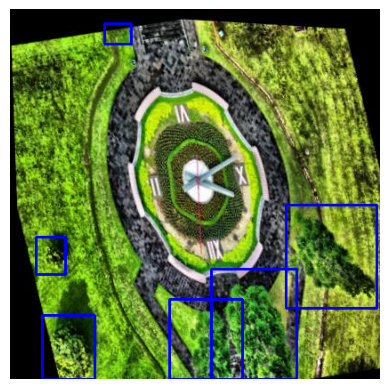

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Caminho para as imagens e rótulos
image_dir = "./Images/Trees - 5/train/images"
label_dir = "./Images/Trees - 5/train/labels"

# Função para visualizar imagens e bounding boxes orientadas/polígonos
def plot_image_with_polygons(image_path, label_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    try:
        with open(label_path, 'r') as file:
            for line in file.readlines():
                values = list(map(float, line.strip().split()))
                class_id = values[0]
                polygon = np.array(values[1:]).reshape(-1, 2)  # Organiza as coordenadas em pares (x, y)

                # Converte coordenadas relativas para absolutas
                polygon[:, 0] *= width
                polygon[:, 1] *= height
                polygon = polygon.astype(np.int32)

                # Desenha o polígono na imagem
                cv2.polylines(image, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)

        # Converte BGR para RGB para visualização com matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Erro ao processar o arquivo {label_path}: {str(e)}")

# Exemplo de visualização de uma imagem com bounding boxes orientadas/polígonos
sample_image = f"{image_dir}/1_jpeg.rf.8db8e2032cb0916318b4cf0df33bea22.jpg"
sample_label = f"{label_dir}/1_jpeg.rf.8db8e2032cb0916318b4cf0df33bea22.txt"

plot_image_with_polygons(sample_image, sample_label)

Avaliando o conteúdo do TFRecord.

In [ ]:
# Função para inspecionar o conteúdo do arquivo de rótulo
def inspect_label_file(label_path):
    with open(label_path, 'r') as file:
        print(f"Conteúdo do arquivo {label_path}:")
        for line in file.readlines():
            print(line.strip())

# Verificar o conteúdo do arquivo de rótulo
inspect_label_file(sample_label)

### Treinando o modelo bala.

In [3]:
from ultralytics import YOLO

# Carregar o modelo YOLOv5 Nano
model = YOLO('yolov8n.pt')

# Treinar o modelo com seu dataset
model.train(data='./data.yaml', epochs=100, imgsz=244, batch=16, amp=False)

# Avaliar o modelo no conjunto de validação
model.val()

100%|██████████| 6.25M/6.25M [00:00<00:00, 11.9MB/s]


Ultralytics YOLOv8.2.82  Python-3.12.0 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=244, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

c:\Users\gabig\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\engine\trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\gabig\OneDrive\Área de Trabalho\Trees\Images\Trees - 5\train\labels.cache... 1206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1206/1206 [00:00<?, ?it/s]
val: Scanning C:\Users\gabig\OneDrive\Área de Trabalho\Trees\Images\Trees - 5\valid\labels.cache... 118 images, 2 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.81G      2.604      2.609      1.717        155        256: 100%|██████████| 76/76 [00:11<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        118       3189       0.42      0.404      0.332      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.805G      2.363      1.599      1.457        179        256: 100%|██████████| 76/76 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        118       3189      0.441      0.456      0.413      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.778G      2.251      1.405      1.424        241        256: 100%|██████████| 76/76 [00:07<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        118       3189      0.349      0.394      0.303      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.879G      2.177      1.341      1.406        172        256: 100%|██████████| 76/76 [00:06<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        118       3189      0.486      0.487      0.447      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.805G      2.148      1.316      1.401        244        256: 100%|██████████| 76/76 [00:06<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        118       3189      0.514      0.524      0.492      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.81G      2.145      1.325      1.395        220        256: 100%|██████████| 76/76 [00:06<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        118       3189      0.585      0.511      0.516      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.807G      2.087      1.283      1.377        171        256: 100%|██████████| 76/76 [00:06<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        118       3189      0.494      0.479      0.463      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.786G       2.08      1.275      1.373        284        256: 100%|██████████| 76/76 [00:06<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        118       3189      0.448      0.489      0.436       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.858G      2.066      1.264      1.366        234        256: 100%|██████████| 76/76 [00:06<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        118       3189      0.568      0.562      0.559      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.776G      2.069      1.266      1.371        227        256: 100%|██████████| 76/76 [00:06<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        118       3189       0.42      0.478      0.386      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.937G      2.048      1.248      1.362        216        256: 100%|██████████| 76/76 [00:06<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        118       3189      0.506      0.498       0.48       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.828G      2.041      1.261      1.368        233        256: 100%|██████████| 76/76 [00:06<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        118       3189      0.498       0.49      0.473      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.849G      2.043      1.263      1.366        229        256: 100%|██████████| 76/76 [00:06<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        118       3189      0.559       0.52       0.52       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.849G      2.033      1.246      1.358        195        256: 100%|██████████| 76/76 [00:06<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        118       3189      0.532      0.527      0.512      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.967G       2.02      1.233      1.353        257        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        118       3189      0.569      0.568      0.573       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.776G      2.012      1.234      1.352        229        256: 100%|██████████| 76/76 [00:06<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        118       3189      0.557      0.534      0.544      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.895G      2.006      1.226      1.345        242        256: 100%|██████████| 76/76 [00:06<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        118       3189      0.572       0.54      0.555      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.839G      2.009       1.22      1.341        253        256: 100%|██████████| 76/76 [00:06<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        118       3189       0.49      0.479      0.455       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.854G      1.979      1.217      1.341        294        256: 100%|██████████| 76/76 [00:06<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        118       3189      0.531      0.527        0.5      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.839G      1.972      1.214      1.339        266        256: 100%|██████████| 76/76 [00:06<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        118       3189      0.533      0.541      0.526      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.879G      1.964      1.194      1.329        297        256: 100%|██████████| 76/76 [00:06<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        118       3189      0.563      0.531       0.53      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.828G      1.978        1.2      1.337        345        256: 100%|██████████| 76/76 [00:06<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        118       3189       0.52      0.525      0.497      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.814G      1.962      1.198       1.33        177        256: 100%|██████████| 76/76 [00:06<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        118       3189      0.584      0.546      0.569      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.839G      1.958       1.21      1.333        204        256: 100%|██████████| 76/76 [00:06<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        118       3189      0.494      0.507      0.475      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.822G      1.958       1.19      1.332        195        256: 100%|██████████| 76/76 [00:06<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        118       3189      0.529      0.515      0.504      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.776G      1.952      1.196       1.32        168        256: 100%|██████████| 76/76 [00:06<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        118       3189       0.54       0.53      0.532      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.872G      1.936      1.176      1.321        173        256: 100%|██████████| 76/76 [00:06<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        118       3189       0.53      0.507      0.506      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.822G      1.935      1.186       1.32        114        256: 100%|██████████| 76/76 [00:06<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        118       3189      0.579      0.583      0.587      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.801G      1.948      1.183      1.318        216        256: 100%|██████████| 76/76 [00:06<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        118       3189      0.616      0.569      0.609      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.814G      1.918      1.169       1.32        337        256: 100%|██████████| 76/76 [00:07<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        118       3189      0.538      0.545      0.536      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.841G       1.92      1.161      1.312        355        256: 100%|██████████| 76/76 [00:06<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        118       3189      0.507      0.524      0.486      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.835G      1.918      1.159      1.305        271        256: 100%|██████████| 76/76 [00:06<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        118       3189      0.546      0.553      0.537      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.906G      1.919      1.158      1.311        268        256: 100%|██████████| 76/76 [00:06<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        118       3189      0.508      0.558      0.516      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.854G      1.913      1.172      1.306        136        256: 100%|██████████| 76/76 [00:06<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        118       3189      0.539      0.575       0.55      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.818G      1.904       1.16      1.312        257        256: 100%|██████████| 76/76 [00:06<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        118       3189      0.482       0.52      0.473        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.791G      1.909      1.148      1.296        212        256: 100%|██████████| 76/76 [00:06<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all        118       3189       0.59      0.579      0.591      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.843G      1.885      1.145      1.301        311        256: 100%|██████████| 76/76 [00:06<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        118       3189      0.601      0.565      0.581      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.791G      1.895      1.148      1.304        164        256: 100%|██████████| 76/76 [00:06<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        118       3189      0.559      0.541      0.539      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.816G      1.901      1.147      1.292        221        256: 100%|██████████| 76/76 [00:06<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        118       3189      0.574      0.579      0.574      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.856G      1.895      1.146      1.291        322        256: 100%|██████████| 76/76 [00:06<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        118       3189       0.53      0.554      0.536      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.839G      1.881      1.125      1.281        307        256: 100%|██████████| 76/76 [00:06<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        118       3189      0.577      0.584      0.578      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.814G      1.877      1.135      1.287        200        256: 100%|██████████| 76/76 [00:06<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        118       3189      0.542      0.593      0.559      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.862G       1.89      1.132      1.289        301        256: 100%|██████████| 76/76 [00:06<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        118       3189      0.573       0.56      0.566       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.814G      1.871      1.126      1.292        161        256: 100%|██████████| 76/76 [00:06<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        118       3189      0.545      0.558       0.54      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.868G      1.869      1.127      1.281        272        256: 100%|██████████| 76/76 [00:06<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        118       3189      0.581      0.579      0.586      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.805G      1.859      1.124       1.28        188        256: 100%|██████████| 76/76 [00:06<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        118       3189        0.6      0.574      0.588      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.791G      1.868      1.134      1.286        188        256: 100%|██████████| 76/76 [00:06<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        118       3189      0.519      0.551      0.517      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.872G      1.853      1.108      1.282        216        256: 100%|██████████| 76/76 [00:06<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        118       3189      0.628      0.614      0.633      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.883G      1.856      1.113      1.279        176        256: 100%|██████████| 76/76 [00:06<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        118       3189       0.58      0.589      0.576      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.793G       1.85      1.115      1.272        186        256: 100%|██████████| 76/76 [00:06<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        118       3189      0.592      0.595      0.601      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.833G      1.851      1.109      1.278        212        256: 100%|██████████| 76/76 [00:06<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        118       3189      0.547       0.55       0.54      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.898G       1.85      1.107      1.278        340        256: 100%|██████████| 76/76 [00:06<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        118       3189      0.565      0.568      0.563      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.799G       1.82      1.102      1.273        137        256: 100%|██████████| 76/76 [00:06<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        118       3189      0.575      0.581      0.567      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.843G      1.838      1.099      1.274        318        256: 100%|██████████| 76/76 [00:06<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        118       3189      0.575       0.58      0.577      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.795G       1.82       1.09       1.27        182        256: 100%|██████████| 76/76 [00:06<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        118       3189      0.559       0.58      0.564      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.856G      1.827      1.097      1.271        202        256: 100%|██████████| 76/76 [00:06<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        118       3189      0.544      0.572      0.554      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.851G      1.826      1.093      1.264        285        256: 100%|██████████| 76/76 [00:06<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        118       3189      0.607      0.608      0.607      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.822G      1.814      1.088      1.263        240        256: 100%|██████████| 76/76 [00:06<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        118       3189      0.595      0.598      0.608      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.856G      1.815      1.082      1.264        179        256: 100%|██████████| 76/76 [00:06<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        118       3189      0.578      0.578      0.572      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.818G      1.806      1.088       1.26        338        256: 100%|██████████| 76/76 [00:06<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        118       3189      0.592      0.607      0.599      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      0.78G      1.804      1.074      1.258        272        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        118       3189      0.616      0.576      0.596      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.914G      1.809      1.081      1.263        205        256: 100%|██████████| 76/76 [00:06<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        118       3189      0.578      0.598      0.598       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.845G      1.802      1.076      1.253        251        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        118       3189       0.56      0.612      0.579       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      0.83G      1.805      1.065      1.258        333        256: 100%|██████████| 76/76 [00:06<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        118       3189      0.575      0.597       0.58      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      0.78G      1.784      1.068      1.255        211        256: 100%|██████████| 76/76 [00:06<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        118       3189      0.592      0.591      0.589      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      0.78G      1.794      1.077      1.257        136        256: 100%|██████████| 76/76 [00:06<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        118       3189       0.59      0.586      0.593       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.822G       1.79      1.066      1.258        213        256: 100%|██████████| 76/76 [00:06<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        118       3189      0.551      0.576      0.555      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.784G      1.788      1.068      1.252        241        256: 100%|██████████| 76/76 [00:06<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        118       3189      0.566      0.577      0.568       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.906G      1.784      1.061       1.25        188        256: 100%|██████████| 76/76 [00:06<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        118       3189      0.601      0.581      0.589      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.893G      1.787      1.058      1.249        240        256: 100%|██████████| 76/76 [00:06<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        118       3189      0.634      0.594      0.622      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.782G      1.775       1.05      1.243        230        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        118       3189      0.595        0.6      0.603      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.826G      1.777      1.054      1.243        265        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        118       3189      0.612      0.602      0.611      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.847G      1.766      1.043      1.243        238        256: 100%|██████████| 76/76 [00:06<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        118       3189      0.634      0.607      0.628      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.816G      1.765      1.053      1.244        188        256: 100%|██████████| 76/76 [00:06<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        118       3189      0.604      0.599      0.607      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.837G      1.754       1.04      1.244        180        256: 100%|██████████| 76/76 [00:06<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        118       3189      0.601      0.597      0.599      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.807G      1.762      1.044      1.244        262        256: 100%|██████████| 76/76 [00:06<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        118       3189      0.572      0.605      0.581      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.791G      1.764      1.045      1.245        155        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        118       3189      0.604      0.597      0.606      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.835G      1.751      1.049      1.241        225        256: 100%|██████████| 76/76 [00:07<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        118       3189      0.614      0.606      0.616      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.908G      1.747      1.029      1.235        168        256: 100%|██████████| 76/76 [00:06<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        118       3189      0.585      0.607      0.605      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.789G      1.748      1.029      1.232        198        256: 100%|██████████| 76/76 [00:06<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        118       3189      0.588      0.598      0.596      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.801G      1.745       1.03      1.235        172        256: 100%|██████████| 76/76 [00:06<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        118       3189      0.575       0.59      0.574      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       0.9G      1.753       1.03       1.23        208        256: 100%|██████████| 76/76 [00:07<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        118       3189      0.606      0.611      0.618      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.774G      1.737      1.026      1.232        192        256: 100%|██████████| 76/76 [00:06<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        118       3189      0.577      0.607      0.576      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      0.78G      1.734      1.029      1.229        311        256: 100%|██████████| 76/76 [00:06<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        118       3189      0.567      0.608      0.581      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.822G      1.742      1.028      1.234        247        256: 100%|██████████| 76/76 [00:06<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        118       3189      0.595      0.615      0.607      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.856G      1.735      1.025      1.228        230        256: 100%|██████████| 76/76 [00:06<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        118       3189      0.593      0.614      0.604      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.816G      1.723      1.023      1.236        303        256: 100%|██████████| 76/76 [00:06<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        118       3189      0.595      0.596      0.601       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.828G      1.723      1.023      1.229        265        256: 100%|██████████| 76/76 [00:06<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        118       3189      0.589      0.597      0.594      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.807G      1.716      1.009      1.227        186        256: 100%|██████████| 76/76 [00:06<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        118       3189      0.594      0.617      0.604       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.845G      1.724      1.009      1.219        228        256: 100%|██████████| 76/76 [00:06<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        118       3189      0.603      0.613      0.615      0.274


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      0.78G      1.759      1.083      1.271        197        256: 100%|██████████| 76/76 [00:06<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all        118       3189      0.583      0.617      0.603       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.789G      1.716      1.044      1.251        127        256: 100%|██████████| 76/76 [00:05<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all        118       3189      0.598      0.624      0.615       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.761G      1.703       1.03      1.243        184        256: 100%|██████████| 76/76 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        118       3189      0.599      0.637      0.612      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.759G      1.703      1.029      1.245        121        256: 100%|██████████| 76/76 [00:05<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        118       3189      0.588      0.615      0.601      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.761G      1.698      1.018       1.24        109        256: 100%|██████████| 76/76 [00:05<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        118       3189      0.584      0.616      0.598      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.759G      1.695      1.014      1.243        144        256: 100%|██████████| 76/76 [00:05<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        118       3189       0.59      0.603      0.592      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.774G       1.68      1.011       1.24         81        256: 100%|██████████| 76/76 [00:05<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        118       3189        0.6      0.613      0.606       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      0.77G      1.683      1.013      1.238        154        256: 100%|██████████| 76/76 [00:05<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        118       3189      0.594      0.614        0.6      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.757G      1.678      1.009      1.235        190        256: 100%|██████████| 76/76 [00:05<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        118       3189      0.607      0.618      0.617      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.765G      1.676      1.007      1.231        151        256: 100%|██████████| 76/76 [00:05<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        118       3189      0.598      0.625      0.615      0.276



100 epochs completed in 0.227 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.82  Python-3.12.0 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


                   all        118       3189      0.627      0.614      0.633      0.283
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to runs\detect\train
Ultralytics YOLOv8.2.82  Python-3.12.0 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\gabig\OneDrive\Área de Trabalho\Trees\Images\Trees - 5\valid\labels.cache... 118 images, 2 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]


                   all        118       3189      0.626      0.615      0.633      0.283
Speed: 0.4ms preprocess, 5.2ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CB565CB3E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Testando o Modelo.

Testando o Modelo Pré-Conversão.

In [6]:
# Realizar inferência em novas imagens e salvar os resultados em um diretório específico
results = model.predict(source='./Images/Trees - 5/test/images', save=True, save_dir='./results')


image 1/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\13_jpg.rf.0d0ec444b9911cc17b09f7a62f3104e8.jpg: 256x256 13 trees, 23.0ms
image 2/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\17_jpg.rf.a155f68af1ff11a50d208c47c2a9a7eb.jpg: 256x256 18 trees, 100.5ms
image 3/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\2018_SJER_3_252000_4106000_image_234_jpeg.rf.5bf0ffaf21b4ca17d380f3a79550f4c8.jpg: 256x256 1 tree, 6.0ms
image 4/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\2018_SJER_3_252000_4106000_image_326_jpeg.rf.973c90998bb890b51465ab12a6fe66e5.jpg: 256x256 (no detections), 6.0ms
image 5/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\2018_SJER_3_252000_4108000_image_517_jpeg.rf.2140d7254f469763e42c1f9d32ec0dac.jpg: 256x256 6 trees, 8.0ms
image 6/60 c:\Users\gabig\OneDrive\rea de Trabalho\Trees\Images\Trees - 5\test\images\2018_SJER_3